In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from analysis_samples import sig10_sample, sig16_sample, sig20_sample, ttbar_sample, zhf_sample, signal_samples, background_samples, all_samples
#from noskim_samples import sig10_sample as sig10_noskim_sample
from bbtautau_helpers import Selection, BranchCut, CompositeCut, resolved_selection as resolved_selection_func, higg4d2_selection, nice_print_eff
from nn_helpers import AdHocData, NeuralNetworkV0, NeuralNetworkV1, NeuralNetworkV2, pred_tensor, populate_nn_results, load_trained_branches
from branch_names import BranchNames
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import joblib
import torch

In [3]:
all_samples = [sig10_sample, sig16_sample, sig20_sample, ttbar_sample, zhf_sample]

In [7]:
#load_branches = ['NNPredV2Fold', 'DiHiggsMV2Fold', 'HbbDiscV2Fold', 'NNPredV2JZWFold', 'DiHiggsMV2JZWFold', 'HbbDiscV2JZWFold']
load_branches = ['NNPredV2Fold', 'DiHiggsMV2Fold', 'HbbDiscV2Fold']
for sample in list(all_samples):
    load_trained_branches(sample, load_branches) 

In [8]:
boosted_selection = Selection()
nn_cut = BranchCut('NNPredV2Fold', 0.96, 'min')
m_cut = BranchCut('DiHiggsMV2Fold', 1000, 'min')
hbb_cut = BranchCut('HbbDiscV2Fold', 4, 'min')
boosted_selection.add_cut('NN', nn_cut)
boosted_selection.add_cut('Mass', m_cut)
boosted_selection.add_cut('Hbb', hbb_cut)

resolved_selection = resolved_selection_func()
h4d2_selection = higg4d2_selection()

### Resolved Selection Efficiencies

In [9]:
resolved_selection = resolved_selection_func()

In [19]:
for sample in all_samples:
    print(sample.short_name)
    branches = sample.branches
    print(f'{resolved_selection.cuts_eff(branches)*100:.2f}%')
    print()

1 TeV
5.54%

1.6 TeV
1.79%

2 TeV
0.77%

ttbar
0.26%

Z+jets
0.19%



In [20]:
for sample in signal_samples:
    branches = sample.branches
    print(sample.short_name)
    print()
    resolved_selection.eff_rundown(branches)
    print()

1 TeV

Leptons:                  45.69%
LeptonCharge:             52.51%
Taus:                     38.70%
NBTagJet:                 56.57%
LeadingBTagJetPt:         89.99%
SubleadingBTagJetPt:      56.57%
ResolvedDiBJetMass:       87.92%
ResolvedMissingMass:      66.02%

1.6 TeV

Leptons:                  42.86%
LeptonCharge:             34.59%
Taus:                     28.86%
NBTagJet:                 35.68%
LeadingBTagJetPt:         82.32%
SubleadingBTagJetPt:      35.68%
ResolvedDiBJetMass:       86.93%
ResolvedMissingMass:      59.08%

2 TeV

Leptons:                  39.66%
LeptonCharge:             24.99%
Taus:                     21.49%
NBTagJet:                 27.50%
LeadingBTagJetPt:         78.10%
SubleadingBTagJetPt:      27.50%
ResolvedDiBJetMass:       86.62%
ResolvedMissingMass:      53.16%



In [12]:
for sample in signal_samples:
    print(sample.short_name)
    print()
    branches = sample.branches
    leptons_cut = resolved_selection.cuts['Leptons']
    etau_cut = leptons_cut.cuts[0]
    mutau_cut = leptons_cut.cuts[1]
    nice_print_eff('Leptons', leptons_cut.cut_eff(branches))
    nice_print_eff('Electrons', etau_cut.cut_eff(branches))
    nice_print_eff('Muons', mutau_cut.cut_eff(branches))
    print()

1 TeV

Leptons:                  45.69%
Electrons:                19.06%
Muons:                    26.63%

1.6 TeV

Leptons:                  42.86%
Electrons:                17.72%
Muons:                    25.15%

2 TeV

Leptons:                  39.66%
Electrons:                15.92%
Muons:                    23.74%



In [13]:
for sample in signal_samples:
    print(sample.short_name)
    print()
    branches = sample.branches
    #[nele_tight_cut, nele_resolved_cut, nmu_none_resolved_cut, leading_ele_tight_pt_cut, ele_eta_cut, eletau_charge_cut]
    ele_tight_cut = etau_cut.cuts[0]
    ele_resolved_cut = etau_cut.cuts[1]
    mu_resolved_cut = etau_cut.cuts[2]
    pt_cut = etau_cut.cuts[3]
    eta_cut = etau_cut.cuts[4]
    nice_print_eff('1 tight electron', ele_tight_cut.cut_eff(branches))
    nice_print_eff('1 resolved electron', ele_resolved_cut.cut_eff(branches))
    nice_print_eff('0 muons', mu_resolved_cut.cut_eff(branches))
    nice_print_eff('Electron pt', pt_cut.cut_eff(branches))
    nice_print_eff('Electron eta', eta_cut.cut_eff(branches))
    print()

1 TeV

1 tight electron:         35.89%
1 resolved electron:      43.85%
0 muons:                  34.18%
Electron pt:              30.62%
Electron eta:             98.47%

1.6 TeV

1 tight electron:         34.20%
1 resolved electron:      43.98%
0 muons:                  32.31%
Electron pt:              30.55%
Electron eta:             98.58%

2 TeV

1 tight electron:         32.51%
1 resolved electron:      43.58%
0 muons:                  30.39%
Electron pt:              29.60%
Electron eta:             98.71%



In [14]:
selection = Selection()
nele = BranchCut('NEleTight', 1, 'eq')
ntau = BranchCut('NTauLoose', 1, 'eq')
nmu = BranchCut('NResolvedMuons', 0, 'eq')
selection.add_cut('NElectrons', nele)
selection.add_cut('NTaus', ntau)
selection.add_cut('NMuons', nmu)
for sample in signal_samples:
    print(sample.short_name)
    print()
    branches = sample.branches
    nice_print_eff('1 tight electron + 1 loose tau + 0 resolved muons', selection.cuts_eff(branches))
    print()

1 TeV

1 tight electron + 1 loose tau + 0 resolved muons: 7.43%

1.6 TeV

1 tight electron + 1 loose tau + 0 resolved muons: 6.11%

2 TeV

1 tight electron + 1 loose tau + 0 resolved muons: 4.50%



In [15]:
selection = Selection()
nele = BranchCut('NMuMedium', 1, 'eq')
ntau = BranchCut('NTauLoose', 1, 'eq')
nmu = BranchCut('NResolvedElectrons', 0, 'eq')
selection.add_cut('NElectrons', nele)
selection.add_cut('NTaus', ntau)
selection.add_cut('NMuons', nmu)
for sample in signal_samples:
    print(sample.short_name)
    print()
    branches = sample.branches
    nice_print_eff('1 medium muon + 1 loose tau + 0 resolved electrons', selection.cuts_eff(branches))
    print()

1 TeV

1 medium muon + 1 loose tau + 0 resolved electrons: 18.30%

1.6 TeV

1 medium muon + 1 loose tau + 0 resolved electrons: 12.50%

2 TeV

1 medium muon + 1 loose tau + 0 resolved electrons: 9.46%



In [9]:
import warnings
warnings.filterwarnings("ignore")
for sample in all_samples:
    print(sample.short_name)
    branches = sample.branches
    resolved_mask = resolved_selection.combined_cut_mask(branches)
    resolved_nevents = sum(resolved_mask)
    boosted_mask = boosted_selection.combined_cut_mask(branches)
    boosted_nevents = sum(boosted_mask)
    both_mask = np.all([resolved_mask, boosted_mask], axis=0)
    both_nevents = sum(both_mask)
    #print(f'{"Sample":<15}{"Events":<15}{"Error"}')
    print(f'{"Events passing boosted selection:":<40} {boosted_nevents}')
    print(f'{"Events passing resolved selection:":<40} {resolved_nevents}')
    print(f'{"Events passing both selections:":<40} {both_nevents}')
    frac_boosted = both_nevents / boosted_nevents
    if boosted_nevents == 0:
        frac_boosted = 0
    print(f'{"% of boosted events passing resolved selection:":<40} {frac_boosted * 100:.2f}%')
    print()

1 TeV
Events passing boosted selection:        23
Events passing resolved selection:       3688
Events passing both selections:          0
% of boosted events passing resolved selection: 0.00%

1.6 TeV
Events passing boosted selection:        6748
Events passing resolved selection:       1893
Events passing both selections:          169
% of boosted events passing resolved selection: 2.50%

2 TeV
Events passing boosted selection:        3922
Events passing resolved selection:       387
Events passing both selections:          28
% of boosted events passing resolved selection: 0.71%

Z+jets
Events passing boosted selection:        0
Events passing resolved selection:       33
Events passing both selections:          0
% of boosted events passing resolved selection: 0.00%

ttbar
Events passing boosted selection:        1
Events passing resolved selection:       142
Events passing both selections:          0
% of boosted events passing resolved selection: 0.00%

W+jets_taunu
Events passin

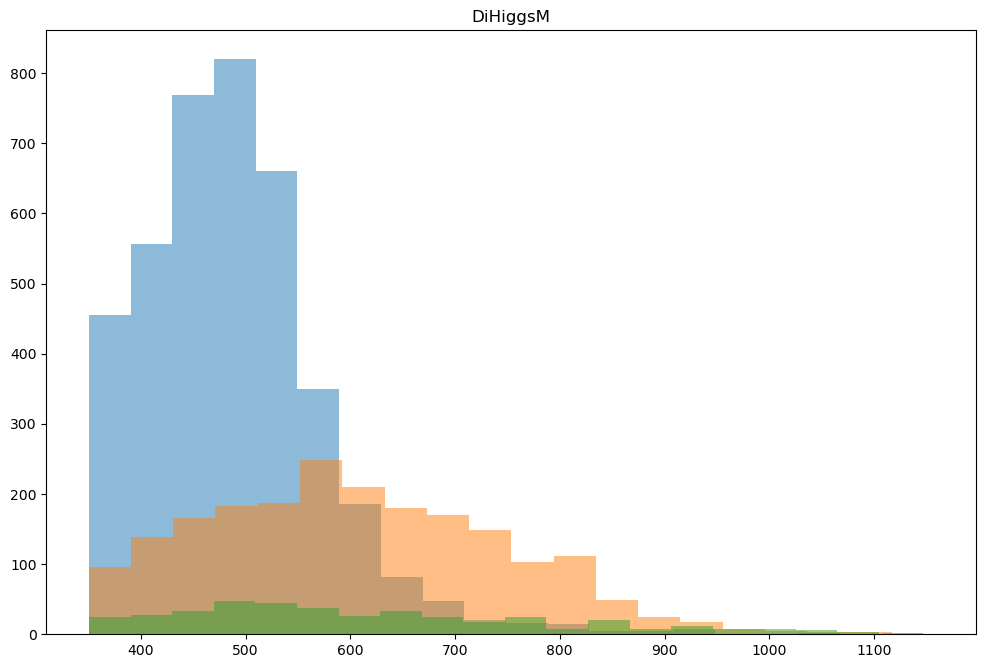

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
m_fig, m_axes = plt.subplots()
nn_fig, nn_axes = plt.subplots()
nn_mcut_fig, nn_mcut_axes = plt.subplots()
hbb_mnncut_fig, hbh_mnncut_axes = plt.subplots()

for sample in signal_samples:
    branches = sample.branches
    resolved_branches = resolved_selection.apply_cuts_to_branches(branches)
    resolved_mcut = resolved_branches[resolved_branches['DiHiggsM'] > 1000]
    resolved_m_nn_cuts = resolved_branches[resolved_branches['NNPredV1'] > 0.95]
    
    m_axes.hist(resolved_branches['DiHiggsM'], 20, alpha=0.5)
    nn_axes.hist(resolved_branches['NNPredV1'], 20, alpha=0.5)
    nn_mcut_axes.hist(resolved_mcut['NNPredV1'], 20, alpha=0.5)
    hbb_mnncut_axes.hist(resolved_m_nn_cuts['HbbDisc'], 20, alpha=0.5)
    
m_axes.set_title('DiHiggsM')
nn_axes.set_title('NNPred')
nn_mcut_axes.set_title('NNPred (M > 1 TeV)')
hbb_mnncut_axes.set_title('HbbDisc')
m_fig.show()
nn_fig.show()
nn_mcut_fig.show()
hbb_mnncut_fig.show()
#     plt.hist(resolved_branches['NNPredV1'], 20)
#     plt.title('NN Output')
#     plt.show()
#     resolved_branches = resolved_branches[resolved_branches['DiHiggsM'] > 1000]
#     plt.hist(resolved_branches['NNPredV1'], 20)
#     plt.title('NN Output (M > 1 TeV)')
#     plt.show()
#     plt.hist(resolved_branches['HbbDisc'], 20)
#     plt.title('Hbb (M > 1 TeV)')
#     plt.show()
#     print(max(resolved_branches['NNPredV1']))
#     resolved_branches = resolved_branches[resolved_branches['NNPredV1'] > 0.95]
#     plt.hist(resolved_branches['HbbDisc'], 20)
#     plt.title('Hbb (M > 1 TeV, NN > 0.95)')
#     plt.show()

### HIGG4D2 Efficiencies

In [1]:
print('1 TeV')
print('84%')
print()
print('1.6 TeV')
print('84%')
print()
print('2 TeV')
print('82%')

1 TeV
84%

1.6 TeV
84%

2 TeV
82%


In [8]:
for sample in all_samples:
    print(sample.short_name)
    branches = sample.branches
    print(f'{h4d2_selection.cuts_eff(branches)*100:.2f}%')
    print()

1 TeV


NameError: name 'h4d2_selection' is not defined

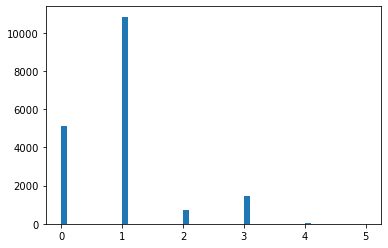

In [14]:
plt.hist(branches['LeadingTauLooseNTracks'], 50, range=[0, 5])
plt.show()

In [11]:
branches = sig10_sample.eff_branches
print(len(branches))
print(ak.flatten(branches['EleTightPt']))

72278
[85.3, 227, 196, 14.5, 4.19, 90.4, 198, ... 34.3, 4.98, 10.9, 76.7, 141, 21.2, 98.9]


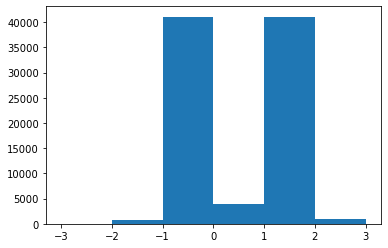

In [19]:
plt.hist(ak.flatten(branches['TauLooseCharge']), 6, range=[-3, 3])
plt.show()

(array([2.4704e+04, 0.0000e+00, 3.5808e+04, 0.0000e+00, 1.0276e+04,
        0.0000e+00, 1.3720e+03, 0.0000e+00, 1.1300e+02, 5.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

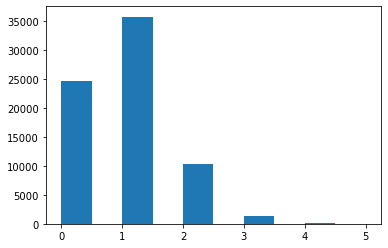

In [35]:
branches = sig10_sample.branches
plt.hist(branches['NResolvedMuons'])

(array([ 62.,   0., 531.,   0., 308.,   0.,  82.,   0.,  15.,   2.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

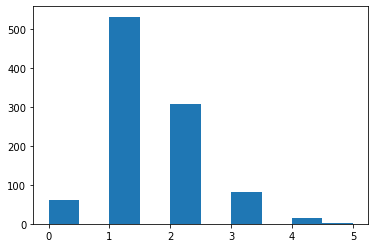

In [74]:
branches = sig10_noskim_sample.branches
branches['NIDLepton'] = branches['NEleLoose'] + branches['NMuTight']
plt.hist(branches['NIDLepton'])

In [76]:
branches = sig10_noskim_sample.branches
lrjet_mask = branches['LeadingLargeRJetPt'] > 350
lepton_mask = branches['NIDLepton'] > 0
daod_mask = np.all([lrjet_mask, lepton_mask], axis=0)
print(len(branches))
print(len(branches[daod_mask]))

1000
714


(array([485.,  56., 110., 179., 115.,  39.,   9.,   0.,   4.,   3.]),
 array([-1.00000000e+00,  2.03158899e+02,  4.07317798e+02,  6.11476697e+02,
         8.15635596e+02,  1.01979449e+03,  1.22395339e+03,  1.42811229e+03,
         1.63227119e+03,  1.83643009e+03,  2.04058899e+03]),
 <BarContainer object of 10 artists>)

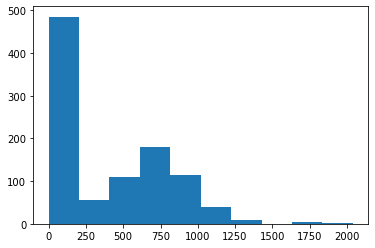

In [80]:
branches = sig10_noskim_sample.branches
plt.hist(branches['ResolvedMissingMass'])